In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## <font color=darkred> Handwritten digit recognition with MNIST </font>

The MNIST (dataset contains images representing handwritten digits.   

### Let's start by exploring the Dataset

In [72]:
df=pd.read_csv("data/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X=df.drop(["label"],axis=1)
y=df["label"]

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((29399, 784), (29399,), (12601, 784), (12601,))

In [75]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
x_train = x_train.to_numpy()
y_train  = y_train.to_numpy()

Each input image is a 28 x 28 matrix, each entry representing a gray level. Thus, each input data is a $ d = 28 * 28 = 784 $ vector 


In [76]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations

# Number of classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28




x_train     = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test      = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# normalize the input data
x_train = x_train/255
x_test  = x_test/255

x_train shape: (29399, 28, 28, 1)
x_test shape: (12601, 28, 28, 1)
y_train shape: (29399,)
y_test shape: (12601,)
29399 train samples
12601 test samples


In [77]:
y_train[4]

7

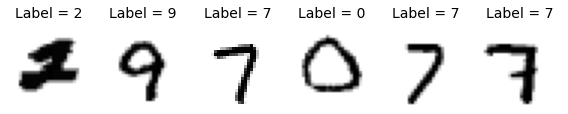

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray_r")
    plt.title('Label = %d' % y_train[i], fontsize=14)
    plt.axis("off")
plt.tight_layout()

The labels in $\{0, 1, 2, \ldots, 9\}$ can represented using one-hot encoding: labels in $\{0, 1, 2, \ldots, 9\}$ are replaced by labels in $\{ 0, 1\}^{10}$, namely $0$ is replaced by $(1, 0, \ldots 0)$, $1$ is replaced by $(0, 1, 0, \ldots 0)$, $2$ is replaced by $(0, 0, 1, 0, \ldots, 0)$, etc.

In [79]:
# convert class vectors to binary class matrices
from keras.utils import np_utils

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

A softmax regression model can be designed and estimated using Keras as this model is a feed froward neural network with only one layer. Each input data $X$ is represented by a 784 dimensional vector and the first layer is made of $10$ neurons each one corresponding to one class and computing $p_k(X)$ for each $$ 0\leqslant k\leqslant 9 $$.

### Let's build a very simple Neural Network to explore the Keras library

In [80]:
# Creating a simple Neurnl network using Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create a model prone to add layers sequentially
model = Sequential()
# flatten the data replaces 28 * 28 matrices by a 784 dimensional vector
model.add(Flatten(input_shape=input_shape, name='flatten'))

model.add(Dense(num_classes, activation='softmax', name='dense_softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_softmax (Dense)       (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [81]:
batch_size = 64
epochs = 25
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
460/460 [==============================] - 5s 9ms/step - loss: 1.9437 - accuracy: 0.4058 - val_loss: 1.6692 - val_accuracy: 0.6064
Epoch 2/25
460/460 [==============================] - 3s 6ms/step - loss: 1.5145 - accuracy: 0.6785 - val_loss: 1.3937 - val_accuracy: 0.7181
Epoch 3/25
460/460 [==============================] - 2s 5ms/step - loss: 1.3025 - accuracy: 0.7416 - val_loss: 1.2307 - val_accuracy: 0.7591
Epoch 4/25
460/460 [==============================] - 2s 5ms/step - loss: 1.1685 - accuracy: 0.7711 - val_loss: 1.1209 - val_accuracy: 0.7787
Epoch 5/25
460/460 [==============================] - 3s 7ms/step - loss: 1.0744 - accuracy: 0.7879 - val_loss: 1.0405 - val_accuracy: 0.7906
Epoch 6/25
460/460 [==============================] - 4s 8ms/step - loss: 1.0038 - accuracy: 0.8006 - val_loss: 0.9787 - val_accuracy: 0.8004
Epoch 7/25
460/460 [==============================] - 4s 9ms/step - loss: 0.9486 - accuracy: 0.8089 - val_loss: 0.9294 - val_accuracy: 0.8087
Epoch 

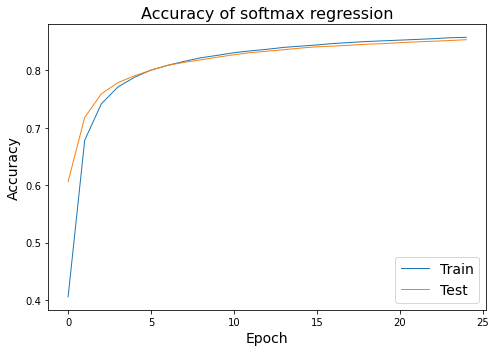

In [82]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

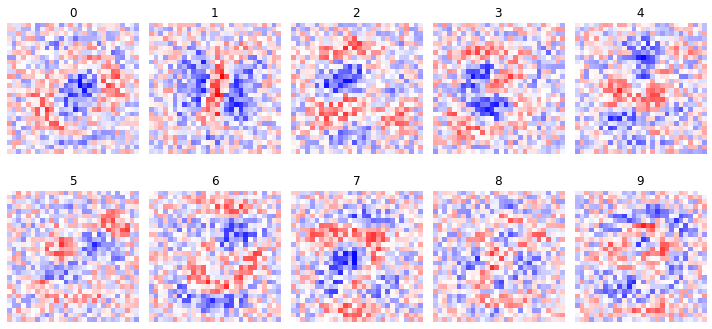

In [83]:
weights, biases = model.get_layer('dense_softmax').get_weights()
imgs = weights.reshape(28, 28, 10)

fig = plt.figure(figsize=(10, 5))
vmin, vmax = imgs.min(), imgs.max()
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    im = imgs[:, :, i]
    mappable = ax.imshow(im, interpolation="nearest", 
                         vmin=vmin, vmax=vmax, cmap='bwr')
    ax.axis('off')
    ax.set_title("%i" % i)
plt.tight_layout()

### <font color=darkred> Feed-Forward Neural Network (FFNN) </font>

Let's build a more flexible NN with more parameters to try getting better results.

 Let's create a fully connected feed-forward neural network with one hidden layer  with 128 units and a relu activation function. 

In [84]:
from tensorflow.keras import activations

input_shape = (28, 28, 1)
model_ffnn = Sequential()

model_ffnn.add(Flatten(input_shape=input_shape))

model_ffnn.add(Dense(128, input_dim=10, activation='relu'))

model_ffnn.add(Dense(10, activation='softmax'))

model_ffnn.add(layers.Activation(activations.relu))

Number of parameters involved in the model :

The input size is 28*28 = 784. 

This input is transformed linearly in 128 hidden units in the dense layer which lead to 128*784 + 128 = 100480 parameters to obtain the 128 units.

These units are transformed in a ``softmax`` activation function which adds 10*128 + 10 = 1290 parameters.

This Feed Forward Neural Networks depends on 101770 parameters !

In [85]:
model_ffnn.compile(
    loss=keras.losses.categorical_crossentropy,

    optimizer=keras.optimizers.Adagrad(),
    metrics=['accuracy']
)
model_ffnn.summary()    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [86]:
batch_size = 32
epochs = 25
history = model_ffnn.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
score = model_ffnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
919/919 [==============================] - 7s 6ms/step - loss: 1.5238 - accuracy: 0.6197 - val_loss: 1.0305 - val_accuracy: 0.7979
Epoch 2/25
919/919 [==============================] - 5s 5ms/step - loss: 0.8439 - accuracy: 0.8266 - val_loss: 0.7228 - val_accuracy: 0.8416
Epoch 3/25
919/919 [==============================] - 5s 5ms/step - loss: 0.6518 - accuracy: 0.8536 - val_loss: 0.6038 - val_accuracy: 0.8567
Epoch 4/25
919/919 [==============================] - 6s 7ms/step - loss: 0.5635 - accuracy: 0.8676 - val_loss: 0.5383 - val_accuracy: 0.8691
Epoch 5/25
919/919 [==============================] - 5s 6ms/step - loss: 0.5114 - accuracy: 0.8751 - val_loss: 0.4964 - val_accuracy: 0.8765
Epoch 6/25
919/919 [==============================] - 8s 8ms/step - loss: 0.4762 - accuracy: 0.8817 - val_loss: 0.4669 - val_accuracy: 0.8810
Epoch 7/25
919/919 [==============================] - 6s 7ms/step - loss: 0.4505 - accuracy: 0.8858 - val_loss: 0.4450 - val_accuracy: 0.8841
Epoch 

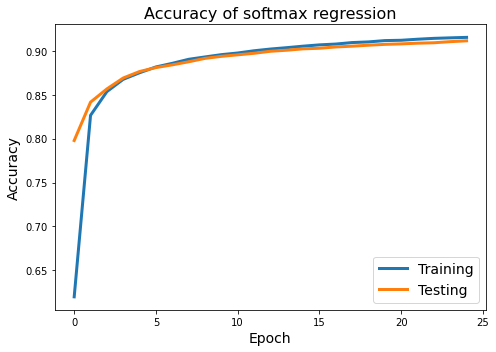

In [87]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

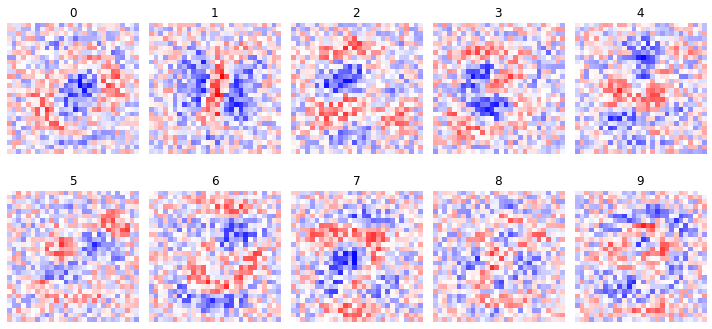

In [88]:
weights, biases = model.get_layer('dense_softmax').get_weights()
imgs = weights.reshape(28, 28, 10)

fig = plt.figure(figsize=(10, 5))
vmin, vmax = imgs.min(), imgs.max()
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    im = imgs[:, :, i]
    mappable = ax.imshow(im, interpolation="nearest", 
                         vmin=vmin, vmax=vmax, cmap='bwr')
    ax.axis('off')
    ax.set_title("%i" % i)
plt.tight_layout()

## Output

In [90]:
l=pd.read_csv("data/sample_submission.csv")
imageId=l["ImageId"]
imageId

0            1
1            2
2            3
3            4
4            5
         ...  
27995    27996
27996    27997
27997    27998
27998    27999
27999    28000
Name: ImageId, Length: 28000, dtype: int64

In [107]:
tst = pd.read_csv('data/test.csv')
tst

In [115]:
test = tst.to_numpy()

test = test.reshape(test.shape[0], img_rows, img_cols, 1)

test.shape

(28000, 28, 28, 1)

In [116]:
pred = model_ffnn.predict(test)
pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [117]:
results=np.argmax(pred,axis=1)
result=pd.DataFrame(results,columns=["Label"])
result.shape

(28000, 1)

In [118]:
submission=pd.concat([imageId,result],axis=1)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [119]:
submission.to_csv("submission.csv",index=False)

In [120]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

/bin/bash: kaggle: command not found
